# College forum posting dataset

<img src="images/graphs228.png" alt="" style="width: 400px;"/>


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

import networkx as nx
from nxviz import CircosPlot

import datetime as dt

import numpy as np
import pandas as pd

path = 'data/dc24/'

## Create a graph from the pandas DataFrame

Let's start by creating a graph from a pandas DataFrame. In this exercise, you'll create a new **bipartite graph** by looping over the `edgelist` (which is a DataFrame object).

For simplicity's sake, in this graph construction procedure, any edge between a student and a forum node will be the 'last' edge (in time) that a student posted to a forum over the entire time span of the dataset, though there are ways to get around this.

Additionally, to shorten the runtime of the exercise, we have provided a sub-sampled version of the edge list as data.

In [2]:
data = pd.read_csv(path+'data2.csv', index_col=0)
data.head()

,student,forum,date
13275,s397,f287,2004-05-31 00:34:50
2677,s55,f19,2004-05-19 22:29:05
29120,s17,f43,2004-08-15 18:03:05
13722,s397,f427,2004-05-31 15:11:06
14385,s484,f340,2004-05-31 22:30:14


In [3]:
# Instantiate a new Graph: G
G = nx.Graph()

In [4]:
# Add nodes from each of the partitions
G.add_nodes_from(data['student'], bipartite='student')
G.add_nodes_from(data['forum'], bipartite='forum')

In [5]:
dict(list(G.nodes().items())[:10])

{'s397': {'bipartite': 'student'},
 's55': {'bipartite': 'student'},
 's17': {'bipartite': 'student'},
 's484': {'bipartite': 'student'},
 's167': {'bipartite': 'student'},
 's354': {'bipartite': 'student'},
 's332': {'bipartite': 'student'},
 's47': {'bipartite': 'student'},
 's381': {'bipartite': 'student'},
 's65': {'bipartite': 'student'}}

In [6]:
dict(list(G.nodes().items())[-10:])

{'f502': {'bipartite': 'forum'},
 'f501': {'bipartite': 'forum'},
 'f351': {'bipartite': 'forum'},
 'f213': {'bipartite': 'forum'},
 'f79': {'bipartite': 'forum'},
 'f204': {'bipartite': 'forum'},
 'f200': {'bipartite': 'forum'},
 'f446': {'bipartite': 'forum'},
 'f400': {'bipartite': 'forum'},
 'f449': {'bipartite': 'forum'}}

In [7]:
G.edges()

EdgeView([])

In [8]:
# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date'])

In [9]:
list(G.edges(data=True))[:10]

[('s397', 'f287', {'date': '2004-05-31 15:45:08'}),
 ('s397', 'f427', {'date': '2004-05-31 15:11:06'}),
 ('s397', 'f73', {'date': '2004-05-24 23:33:06'}),
 ('s397', 'f63', {'date': '2004-05-26 01:26:21'}),
 ('s397', 'f336', {'date': '2004-06-04 22:22:10'}),
 ('s397', 'f82', {'date': '2004-06-04 19:20:18'}),
 ('s397', 'f377', {'date': '2004-05-30 14:33:37'}),
 ('s55', 'f19', {'date': '2004-05-26 10:16:55'}),
 ('s55', 'f169', {'date': '2004-05-31 18:07:39'}),
 ('s17', 'f43', {'date': '2004-09-18 20:44:34'})]

## Visualize the degree centrality distribution of the students projection

In this exercise, you will `visualize the degree centrality distribution of the students projection`.

In [10]:
# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']
student_nodes[:10]

['s397', 's55', 's17', 's484', 's167', 's354', 's332', 's47', 's381', 's65']

In [11]:
# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)
list(G_students.edges(data=True))[:10]

[('s397', 's243', {}),
 ('s397', 's38', {}),
 ('s397', 's99', {}),
 ('s397', 's290', {}),
 ('s397', 's286', {}),
 ('s397', 's160', {}),
 ('s397', 's213', {}),
 ('s397', 's209', {}),
 ('s397', 's259', {}),
 ('s397', 's455', {})]

In [12]:
# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)
dict(list(dcs.items())[-10:])

{'s90': 0.018018018018018018,
 's436': 0.012012012012012012,
 's694': 0.0,
 's287': 0.018018018018018018,
 's30': 0.018018018018018018,
 's42': 0.006006006006006006,
 's836': 0.018018018018018018,
 's259': 0.015015015015015015,
 's749': 0.003003003003003003,
 's166': 0.012012012012012012}

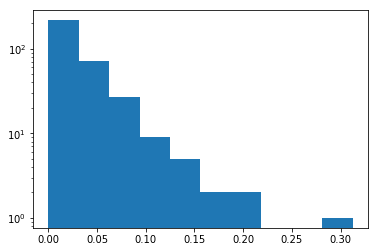

In [13]:
# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show();

## Visualize the degree centrality distribution of the forums projection

This exercise is also to reinforce the concepts of degree centrality and projections. This time round, you'll `plot the degree centrality distribution for the 'forum' projection`. Follow the same steps as in the previous exercise!

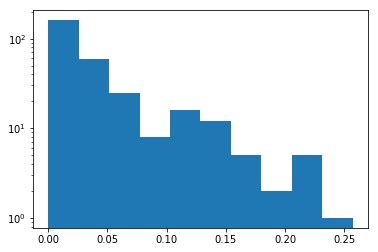

In [14]:
# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show();

## Time filter on edges

You're now going to practice `filtering the graph using a conditional as applied to the edges`. This will help you gain practice and become comfortable with list comprehensions that contain conditionals.

To help you with the exercises, remember that you can import `datetime` objects from the datetime module. On the graph, the metadata has a `date` key that is paired with a datetime object as a value.

In [26]:
# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, 
#  that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if pd.to_datetime(d['date']) < dt.date(2004, 5, 16)])


In [28]:
G_sub.edges(data=True)

EdgeDataView([('s17', 'f8', {'date': '2004-05-15 14:47:41'}), ('s89', 'f32', {'date': '2004-05-15 22:07:44'}), ('s20', 'f10', {'date': '2004-05-15 18:23:38'}), ('s73', 'f13', {'date': '2004-05-15 15:28:20'}), ('s12', 'f1', {'date': '2004-05-14 19:50:12'}), ('s84', 'f10', {'date': '2004-05-15 17:52:14'}), ('s94', 'f2', {'date': '2004-05-15 19:38:00'}), ('s30', 'f1', {'date': '2004-05-14 23:47:40'})])

## Visualize filtered graph using nxviz

Here, you'll visualize the filtered graph using a `CircosPlot`. The `CircosPlot` is a natural choice for this visualization, as you can use node grouping and coloring to visualize the partitions, while the circular layout preserves the aesthetics of the visualization.

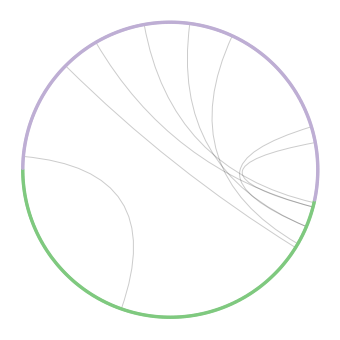

In [30]:
# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.node[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_color='bipartite', node_grouping='bipartite', node_order='dc')

# Draw c to screen
c.draw()

# Display the plot
plt.show();

We see that the most connected users overall aren't posting to the most popular forums early on. This trend may change as we go forward.

## Plot number of posts being made over time

Let's recap how you can plot evolving graph statistics from the graph data. First off, you will `use the graph data to quantify the number of edges that show up within a chunking time window` of `td` days, which is 2 days in the exercise below.

The datetime variables `dayone` and `lastday` have been provided for you.

In [31]:
dayone = dt.datetime(2004, 5, 14, 0, 0)
lastday = dt.datetime(2004, 10, 26, 0, 0)

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


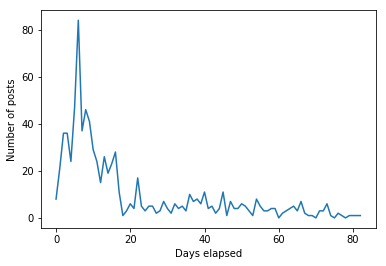

In [33]:
# Import necessary modules
from datetime import timedelta  
import matplotlib.pyplot as plt

# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) \
             if pd.to_datetime(d['date']) >= curr_day and pd.to_datetime(d['date']) < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td
    
# Create the plot
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show();

We can see the initial spike in the number of posts, but it eventually flattens out.

## Extract the mean degree centrality day-by-day on the students partition

Here, you're going to `see if the mean degree centrality over all nodes is correlated with the number of edges that are plotted over time`. There might not necessarily be a strong correlation, and you'll take a look to see if that's the case.

In [34]:
dayone = dt.datetime(2004, 5, 14, 0, 0)
lastday = dt.datetime(2004, 10, 26, 0, 0)

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


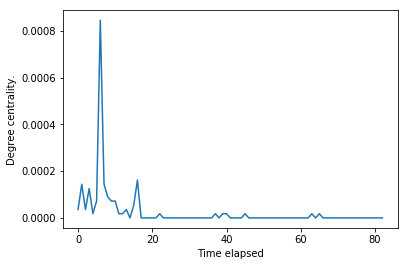

In [36]:
from datetime import datetime, timedelta
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day)  
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if pd.to_datetime(d['date']) \
                          >= curr_day and pd.to_datetime(d['date']) < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show();

## Find the most popular forums day-by-day: I

Great stuff! You're onto the final two exercises - which are really just one long exercise. These will be a good memory workout for your Python programming skills!

We're going to `see how many forums took the title of "the most popular forum" on any given time window`.

In [37]:
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

# Instantiate a list to hold the list of most popular forums by day: most_popular_forums
most_popular_forums = []
# Instantiate a list to hold the degree centrality scores of the most popular forums: highest_dcs
highest_dcs = []
curr_day = dayone  
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1: 
        print(curr_day) 
    # Instantiate new graph: G_sub
    G_sub = nx.Graph()
    
    # Add in nodes from original graph G
    G_sub.add_nodes_from(G.nodes(data=True))
    
    # Add in edges from the original graph G that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) \
                          if pd.to_datetime(d['date']) >= curr_day \
                          and pd.to_datetime(d['date']) < curr_day + td])
    
    # CODE CONTINUES ON NEXT EXERCISE
    curr_day += td

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


## Find the most popular forums day-by-day: II

Now, you're going to finish that exercise - that is, you'll `find out how many forums had the most popular forum score on a per-day basis`!

One of the things you will be doing here is a **"dictionary comprehension"** to filter a dictionary. It is very similar to a list comprehension to filter a list, except the syntax looks like: `{key: val for key, val in dict.items() if ...}`. Keep that in mind!

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


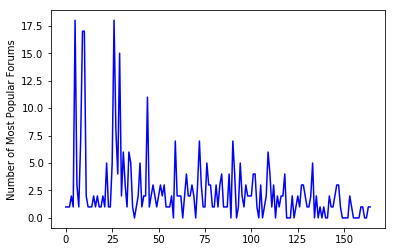

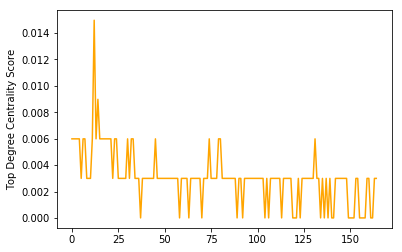

In [38]:
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) \
                          if pd.to_datetime(d['date']) >= curr_day \
                          and pd.to_datetime(d['date']) < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in forum_dcs.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show();

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show();

On a per-day basis, it would be interesting to see which forums were the most popular over time. Some further questions might include - was it the same set over time? Or were some forums really popular early on and others popular later on?